## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

#### Aula 01 - Máquina de Vetor de Suporte

In [2]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from folium.plugins import MarkerCluster
from PIL import Image
from IPython.display import display

print('Setup completo!')


Setup completo!


In [3]:
# download do dataset que será utilizado
iris = datasets.load_iris()

##### 1. Formulação do Problema

O conjunto de dados possuí 150 amostras das flores Íris em que temos os dados de quatro variáveis relacionadas as dimensões físicas da flor e uma variável representando a espécie da flor.

Nossa proposta é utilizar o modelo de aprendizagem de máquinas para classificar, baseado nas medidas de largura e comprimento das petalas e sepalas, qual espécie da flor analisada.

No notebook em questão estamos aplicando o SVM (Máquina de Vetor de Suporte) para a classificação das amostras.

Fonte: https://archive.ics.uci.edu/dataset/53/iris

Glossário do banco de dados:

* sepal length: Representa o comprimento da sépala em da flor em centímetros. Feature	Continuous		cm	false
* sepal width: Representa a largura da sépala em da flor em centímetros.
* petal length: Representa o comprimento da pépala em da flor em centímetros.
* petal width: Representa a largura da sépala em da flor em centímetros.
* class: Representa a espécie da flor, sendo: 1-setosa, 2-versicolor e 3-virginica.

In [4]:
# selecionando as medidas da pétala como entrada X e as espécies como saída y
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [5]:
X.shape

(150, 2)

In [6]:
# selecionando apenas as espécies setosa e versicolor para o desenvolvimento do modelo
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
# atualização do tamanho do conjunto de dados a ser usado
X.shape

(100, 2)

In [8]:
# configurando o modelo classificador SVM linear de margem rígida
svm_clf = SVC(kernel='linear', C=10000) # C=10000 é muito grande
svm_clf.fit(X, y )

SVC(C=10000, kernel='linear')

In [9]:
svm_clf.coef_[0], svm_clf.intercept_[0], svm_clf.support_vectors_

(array([1.29411744, 0.82352928]),
 -3.7882347112962464,
 array([[1.9, 0.4],
        [3. , 1.1]]))

In [10]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k--", linewidth = 2)
    plt.annotate('Margin: {}'.format(round(margin,3)),(xmin,xmin))

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

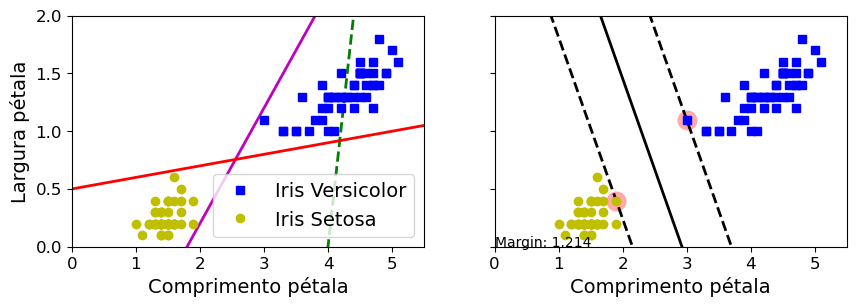

In [11]:
# Plot
fig, axes = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bs", label="Iris Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"yo", label="Iris Setosa")
plt.xlabel("Comprimento pétala", fontsize=14)
plt.ylabel("Largura pétala", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"yo")
plt.xlabel("Comprimento pétala", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

###### **Podemos analisar a influência das escalas dos dados na otimização do SVM**

(-2.0, 2.0, -2.0, 2.0)

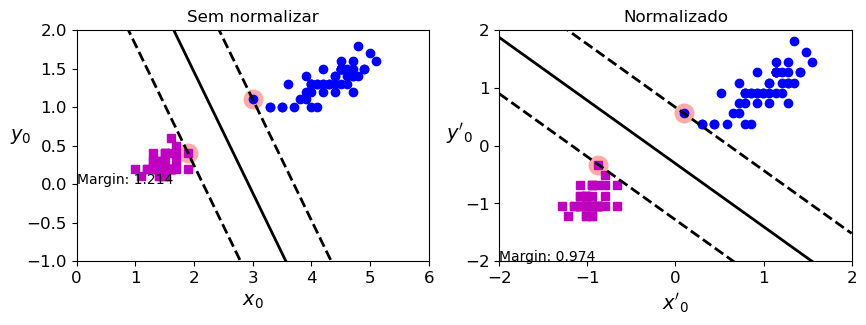

In [12]:
# sem escalonar os dados
svm_clf1 = SVC(kernel='linear', C=100)
svm_clf1.fit(X, y)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0],"ms")
plot_svc_decision_boundary(svm_clf1, 0, 6)
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$y_0$", fontsize=14, rotation=0)
plt.title("Sem normalizar", fontsize=12)
plt.axis([0, 6, -1, 2])

# escalonando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf1.fit(X_scaled, y)

plt.subplot(122)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1],"bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0],"ms")
plot_svc_decision_boundary(svm_clf1, -2, 2)
plt.xlabel("$x'_0$", fontsize=14)
plt.ylabel("$y'_0$", fontsize=14, rotation=0)
plt.title("Normalizado", fontsize=12)
plt.axis([-2, 2, -2, 2])

#### Aula 02 - Máquina de Vetor de Suporte de Margens Suaves

In [13]:
# inclusão de outliers no dataset iris
X_out = np.array([[3.4, 1.3], [3.2, 0.8]])
y_out = np.array([0, 0])

# concatenando ao conjunto de dados
X_o1 = np.concatenate([X, X_out[:1]], axis = 0) 
y_o1 = np.concatenate([y, y_out[:1]], axis = 0)
X_o2 = np.concatenate([X, X_out[1:]], axis = 0)
y_o2 = np.concatenate([y, y_out[1:]], axis = 0)


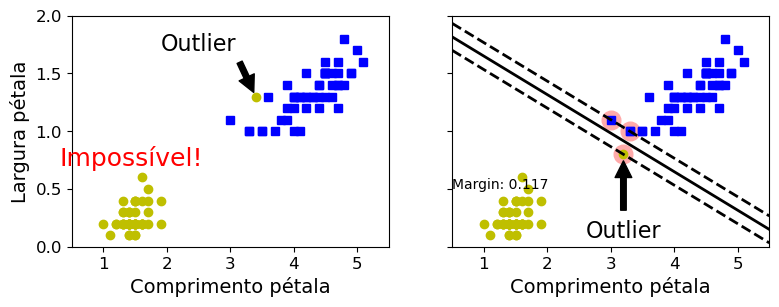

In [14]:
# Criando e ajustando o modelo de SVM linear de margem rígida
svm_clf2 = SVC(kernel='linear', C=100)
svm_clf2.fit(X_o2, y_o2)

fig, axes = plt.subplots(ncols=2, figsize=(9,3), sharey=True)

plt.sca(axes[0])
plt.plot(X_o1[:, 0][y_o1==1], X_o1[:, 1][y_o1==1], "bs")
plt.plot(X_o1[:, 0][y_o1==0], X_o1[:, 1][y_o1==0], "yo")
plt.text(0.3, 0.7, "Impossível!", fontsize=18, color="red")
plt.xlabel("Comprimento pétala", fontsize=14)
plt.ylabel("Largura pétala", fontsize=14)
plt.annotate("Outlier",
             xy=(X_out[0][0], X_out[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0.5, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(X_o2[:, 0][y_o2==1], X_o2[:, 1][y_o2==1], "bs")
plt.plot(X_o2[:, 0][y_o2==0], X_o2[:, 1][y_o2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0.5, 5.5)
plt.xlabel("Comprimento pétala", fontsize=14)
plt.annotate("Outlier",
             xy=(X_out[1][0], X_out[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0.5, 5.5, 0, 2])

plt.show()

Quando comparamos o resultado do modelo de SVM de margem rigida com o SVM de margem suave após a inclusão do outlier fica claro o estreitamento da margem de **1.21 cm** para **0.117 cm**, resultando uma redução de 90,3%


##### Ajustando uma SVM de margens suaves

In [15]:
X3 = iris['data'][:, (2, 3)] # petal length, petal width
y3 = (iris['target'] == 2).astype(np.float64) # iris virginica

svm_clf3 = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss='hinge', random_state=42)),
])
svm_clf3.fit(X3, y3)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [16]:
# Testando a classificação para uma flor com comprimento de 5.5 cm e largura de 1.7 cm
svm_clf3.predict([[5.5, 1.7]])


array([1.])

##### Testando SVMs de margens suaves com diferentes constantes de violação (custo) C

In [17]:
# Configurando diferentes SVMs de margens suaves, com C = 1 e C = 100
scaler = StandardScaler()
svm_clf_1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_100 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf_1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_1),
        ])
scaled_svm_clf_100 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_100),
        ])
scaled_svm_clf_1.fit(X3,y3)
scaled_svm_clf_100.fit(X3,y3)

c:\Users\ninam\anaconda3\envs\ufv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [18]:
# Adaptando o modelo escalonado para preparar os plots
b1 = svm_clf_1.decision_function([-scaler.mean_/scaler.scale_])
b2 = svm_clf_100.decision_function([-scaler.mean_/scaler.scale_])
w1 = svm_clf_1.coef_[0]/scaler.scale_
w2 = svm_clf_100.coef_[0]/scaler.scale_
svm_clf_1.intercept_ = np.array([b1])
svm_clf_100.intercept_ = np.array([b2])
svm_clf_1.coef_ = np.array([w1])
svm_clf_100.coef_ = np.array([w2])

In [19]:
# Calculando os vetores de suporte
t = y3*2 - 1
support_vectors_idx1 = (t * (X3.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X3.dot(w2) + b2) < 1).ravel()
svm_clf_1.support_vectors_ = X3[support_vectors_idx1]
svm_clf_100.support_vectors_ = X3[support_vectors_idx2]

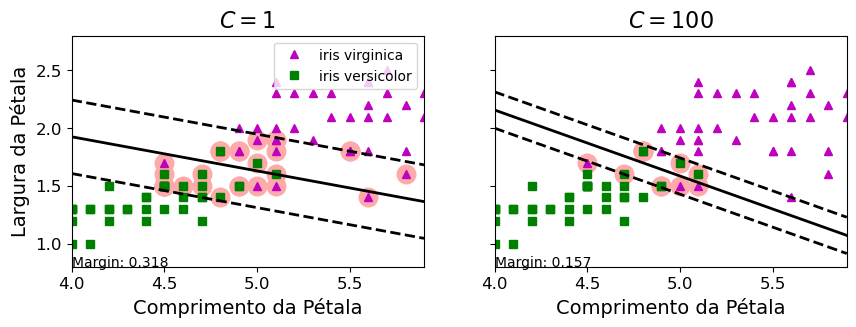

In [20]:
# Plot variando o custo C
fig, axes = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.plot(X3[:, 0][y3==1], X3[:, 1][y3==1], "m^", label="iris virginica")
plt.plot(X3[:, 0][y3==0], X3[:, 1][y3==0], "gs", label="iris versicolor")
plot_svc_decision_boundary(svm_clf_1, 4, 5.9)
plt.xlabel("Comprimento da Pétala", fontsize=14)
plt.ylabel("Largura da Pétala", fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.title("$C = {}$".format(svm_clf_1.C), fontsize=16)
plt.annotate('Margin: {}'.format(round(1/w1[1],3)),(4, 0.8))
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X3[:, 0][y3==1], X3[:, 1][y3==1], "m^")
plt.plot(X3[:, 0][y3==0], X3[:, 1][y3==0], "gs")
plot_svc_decision_boundary(svm_clf_100, 4, 5.9)
plt.xlabel("Comprimento da Pétala", fontsize=14)
plt.title("$C = {}$".format(svm_clf_100.C), fontsize=16)
plt.annotate('Margin: {}'.format(round(1/w2[1],3)),(4, 0.8))
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

Alterar o valor da constante C faz com que a SVM se torne mais flexível ao posicionamento do vetor de suporte, aceitando amostras dentro da margem entre os vetores de suporte.

#### Aula 03 - SVMs Não Lineares e Funções Kernel

In [21]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1) # amplitude = 8, variando de -4 a 4 a cada 1 amostra
X2D = np.c_[X1D, X1D**2] # cria uma coluna na matriz com o quadradico da primeira coluna
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])  # vetor com nove amostras

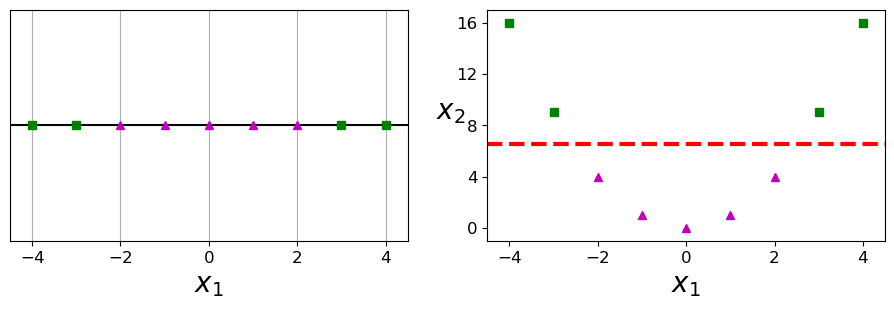

In [22]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), 'gs')
plt.plot(X1D[:, 0][y==1], np.zeros(5), 'm^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], 'gs')
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], 'm^')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

No primeiro gráfico não existe uma possibilidade de uma reta linear separar os dois tipos de amostras. Porém a função quadratica possíbilita essa separação.


Para esse estudo vamos usar um dataset aritificial, make_moons.

In [23]:
# url = 'https://thumbs.gfycat.com/CookedThirdFishingcat-size_restricted.gif'
# gif = Image.open(requests.get(url, stream=True).raw)

In [24]:
# display(gif)

In [31]:
X, y = make_moons(n_samples=200, noise=0.17, random_state=42)

In [32]:
# Função de plot que recebe as entradas e saidas e o eixos do plot
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'gs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'm^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

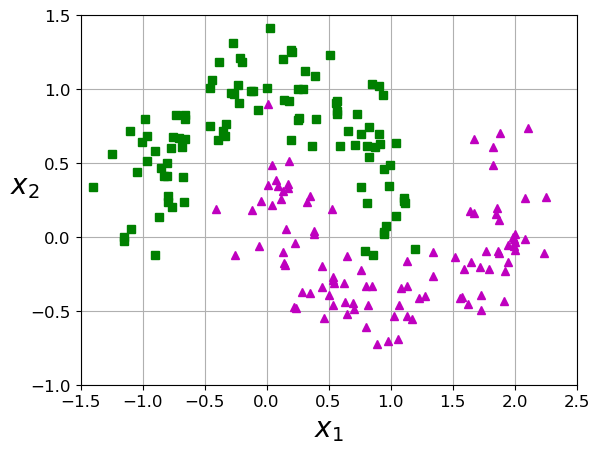

In [33]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Usaremos a função kernel polinomial de terceiro grau a fim de obter a separação do espaço de características e mostrar como o hiperplano **não linear** classificará as amostras

In [34]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=200)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

c:\Users\ninam\anaconda3\envs\ufv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=200)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

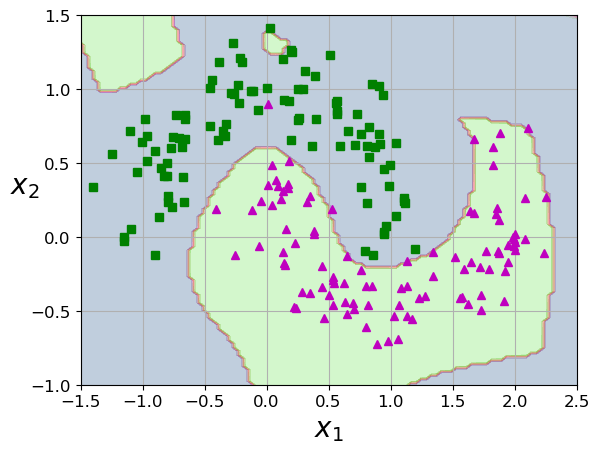

In [35]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

##### SVM Não Linear com Função Kernel Gaussiana
RBF - Radial Based Function

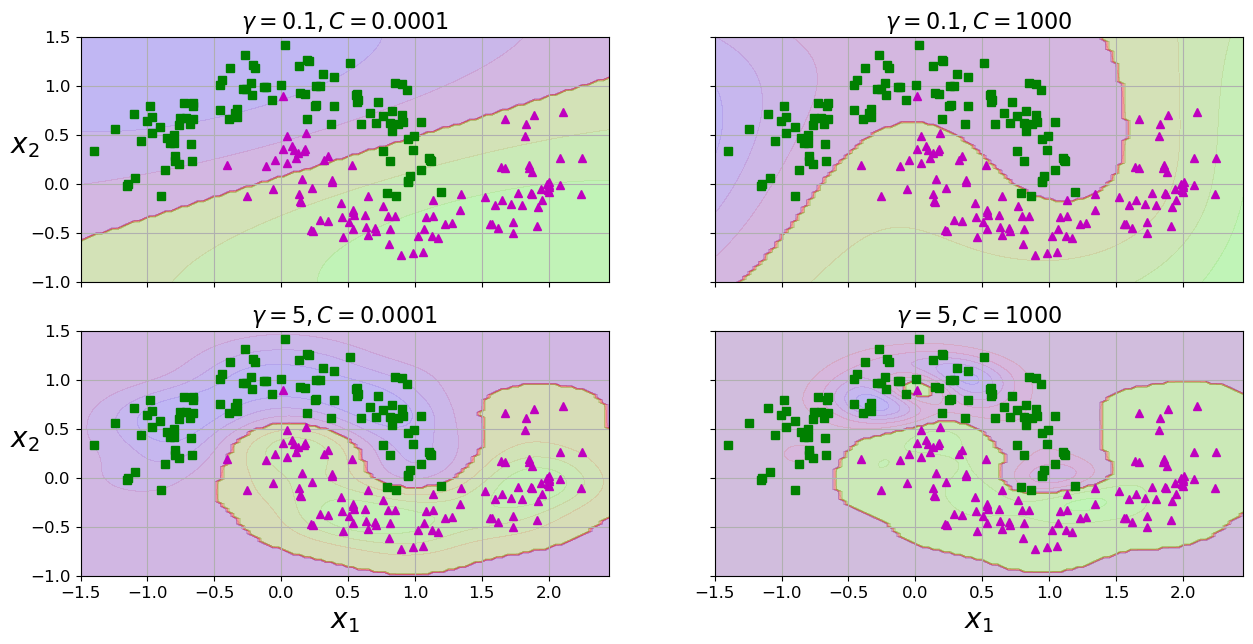

In [38]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.0001, 1000
hyperparameters = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparameters:
    rbf_kernel_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm.fit(X, y)
    svm_clfs.append(rbf_kernel_svm)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparameters[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

Gamma é inversamente proporcional ao desvio padrão da função gaussiana, $\gamma~\alpha~\frac{1}{\sigma}$, dessa forma, quanto maior o valor de *gamma*, mais próximo a função gaussiana de estará das amostras.